In [1]:
import json
import pandas
import order_independent_llm
import glob
import seaborn
import tqdm.auto as tqdm
import matplotlib.pyplot as plt

import order_independent_llm.plot_helpers

params=order_independent_llm.plot_helpers.nice_defaults()

In [2]:
targets = glob.glob("../results/mmlu_quoted/*/*.jsonl")

In [3]:
df = pandas.concat([order_independent_llm.load_to_dataframe(t,fail_on_empty=True) for t in tqdm.tqdm(targets)])

  0%|          | 0/130 [00:00<?, ?it/s]

In [4]:
df.iloc[0]['probs'].keys()

AttributeError: 'list' object has no attribute 'keys'

In [5]:
df_acc = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed',]]
df_acc

response_type,normal,order_independent,normal_reversed
model,,,
gpt2,0.255946,0.254014,0.255704
meta-llama/Llama-2-13b-chat-hf,0.300427,0.275347,0.309498
meta-llama/Llama-2-13b-hf,0.292781,0.284759,0.309492
meta-llama/Llama-2-7b-chat-hf,0.307302,0.272481,0.293780
meta-llama/Llama-2-7b-hf,0.272586,0.260514,0.270639
meta-llama/Meta-Llama-3-8B,0.332652,0.288049,0.320054
mistralai/Mistral-7B-Instruct-v0.2,0.307409,0.270918,0.319572


In [8]:
#df = df[df['model'] =='meta-llama/Llama-2-7b-hf'].copy()

In [9]:
df_conf.columns

NameError: name 'df_conf' is not defined

In [7]:
sorted(list(df_ret.index), key=len)

['Which number is a multiple of 7?<|start_2d|>"27" <|split_2d|>"48" <|split_2d|>"56" <|split_2d|>"74" <|end_2d|>Answer: ',
 'Sound travels in<|start_2d|>"solids" <|split_2d|>"liquids" <|split_2d|>"gases" <|split_2d|>"All of these" <|end_2d|>Answer: ',
 'Which statement is false?<|start_2d|>"3 < 5" <|split_2d|>"5 > 3" <|split_2d|>"−5 > −3" <|split_2d|>"−3 > −5" <|end_2d|>Answer: ',
 'What is 836 rounded to the nearest 10?<|start_2d|>"800" <|split_2d|>"830" <|split_2d|>"840" <|split_2d|>"870" <|end_2d|>Answer: ',
 'What is the greatest common factor of 36 and 90?<|start_2d|>"6" <|split_2d|>"18" <|split_2d|>"36" <|split_2d|>"180" <|end_2d|>Answer: ',
 'When was the telescope invented by Galileo?<|start_2d|>"1409" <|split_2d|>"1509" <|split_2d|>"1609" <|split_2d|>"1709" <|end_2d|>Answer: ',
 'What is the quotient for the expression 2,314 / 4?<|start_2d|>"508" <|split_2d|>"508 r2" <|split_2d|>"578" <|split_2d|>"578 r2" <|end_2d|>Answer: ',
 'As of 2017, what percentage of Indians live in ur

In [6]:
df_conf = df.drop_duplicates(['prompt','response_type']).pivot(
    index = 'prompt',
    columns='response_type',
    values=['is_correct_answer','text_output']
)
df_conf.columns = df_conf.columns.to_flat_index()
df_ret = df_conf[(df_conf[('is_correct_answer', 'normal')] == True) &
(df_conf[('is_correct_answer','normal_reversed')] == False) &
(df_conf[('is_correct_answer','order_independent')] == True)]


In [13]:
df_conf = df.drop_duplicates(['prompt','response_type']).pivot(
    index = 'prompt',
    columns='response_type',
    values='is_correct_answer'
)[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count().reset_index().pivot(
    index = 'normal',
    columns='normal_reversed',
    values='order_independent'
)
df_mean = df.drop_duplicates(['prompt','response_type']).pivot(
    index = 'prompt',
    columns='response_type',
    values='is_correct_answer'
)[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count()
df_mean = df_mean / df_mean.sum().sum()
df_normed = df_conf /df_conf.sum().sum()
print(df_conf.reset_index().to_markdown(index=False))
print(df_normed.reset_index().to_markdown(index=False))

| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |     139 |     30 |
| True     |      28 |     38 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.591489 | 0.12766  |
| True     | 0.119149 | 0.161702 |


In [9]:
plot_dat =[]


for model in df['model'].unique():
    df_conf = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count().reset_index().pivot(
        index = 'normal',
        columns='normal_reversed',
        values='order_independent'
    )
    df_mean = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count()
    df_mean = df_mean / df_mean.sum().sum()
    df_normed = df_conf /df_conf.sum().sum()
    print(model)
    print(df_conf.reset_index().to_markdown(index=False))
    print(df_normed.reset_index().to_markdown(index=False))
    plot_dat.append({
    'model':model,
    'acc' : float(df_mean.loc[(True,False)]) + float(df_mean.loc[(True,True)]),
    'error' :  float(df_mean.loc[(False,True)]),
    'oid' : False,
    #'oid' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean())
    })
    plot_dat.append({
    'model':model,
    'acc' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean()),
    'error' : 0,
    'oid' : True,
    #'oid' : 
    })

meta-llama/Llama-2-13b-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |     871 |    180 |
| True     |     154 |    280 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.586532 | 0.121212 |
| True     | 0.103704 | 0.188552 |
meta-llama/Meta-Llama-3-8B
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    1577 |    334 |
| True     |     365 |    571 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.553916 | 0.117316 |
| True     | 0.128205 | 0.200562 |
meta-llama/Llama-2-7b-chat-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    1663 |    377 |
| True     |     415 |    491 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.564494 | 0.12797  |
| True     | 0.140869 | 0.166667 |
meta-llama/Llama-2-13b-chat-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    10

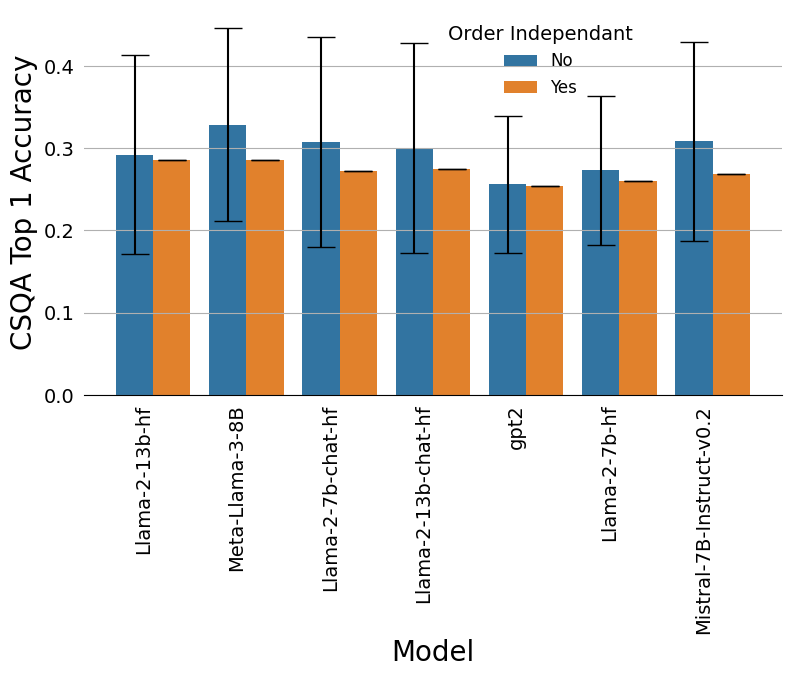

In [16]:
df_plot = pandas.DataFrame(plot_dat)
fig, ax = plt.subplots()
#ax = sns.barplot(x='Param', y='Value', data=df, hue='Name', palette='CMRmap_r')
seaborn.barplot(
    x = 'model',
    y = 'acc',
    data =df_plot,
    hue ='oid',
    #yerr = df_plot['error'],
    ax = ax
)

err_patches =  ax.patches[:7]
oid_patches =  ax.patches[7:-2]

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches][:-2]
y_coords = [p.get_height() for p in ax.patches][:-2]
ax.errorbar(x=[p.get_x() + 0.5 * p.get_width() for p in err_patches], y=[p.get_height() for p in err_patches], 
            yerr=df_plot[df_plot['oid'] == False]["error"], fmt="none", c="k")

ax.errorbar(x=[p.get_x() + 0.5 * p.get_width() for p in oid_patches], y=[p.get_height() for p in oid_patches], 
            yerr=df_plot[df_plot['oid'] == True]["error"], fmt="none", c="k")
#ax.set_ylim([.15,.5])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
patches, labels = ax.get_legend_handles_labels()
label_map = {
    'True' : "Yes",
    "False" : "No",
}
labels = [label_map[l] for l in labels]
ax.legend(patches, labels,bbox_to_anchor=(.5,1),loc = 'upper left', title='Order Independant')
ax.set_xlabel("Model")
ax.set_ylabel("CSQA Top 1 Accuracy")
order_independent_llm.plot_helpers.multi_savefig("CSQA-ACC-errors")

In [ ]:
plot_dat = []
for model in df['model'].unique():
    df_conf = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count().reset_index().pivot(
        index = 'normal',
        columns='normal_reversed',
        values='order_independent'
    )
    df_mean = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count()
    df_mean = df_mean / df_mean.sum().sum()
    df_normed = df_conf /df_conf.sum().sum()
    print(model)
    print(df_conf.reset_index().to_markdown(index=False))
    print(df_normed.reset_index().to_markdown(index=False))
    plot_dat.append({
    'model':model,
    'acc' : float(df_mean.loc[(True,False)]) + float(df_mean.loc[(True,True)]),
    'error' : float(df_mean.loc[(False,True)]), # float(df_mean.loc[(True,False)]) + 
    'oid' : False,
    #'oid' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean())
    })
    plot_dat.append({
    'model':model,
    'acc' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean()),
    'error' : 0,
    'oid' : True,
    #'oid' : 
    })

In [2]:
prompts = order_independent_llm.SplitPrompt.from_json_file("../data/csqa_split/csqa_input_01500.json")

In [7]:
target ='../results/csqa_split/lmsys_vicuna-7b-v1.5-100/lmsys_vicuna-7b-v1.5-100-csqa_input_01000.jsonl_tmp'

In [8]:
p2 = order_independent_llm.filter_prompts(target, prompts)

In [9]:
len(prompts)

500

In [10]:
len(p2)

500

In [7]:
with open(target) as f:
    rets = [json.loads(l) for l in f]

In [12]:
prompts[0].text == rets[0]['prompt']

True

In [9]:
rets[0]['prompt']

'If someone is free from guilt what are they likely to achieve?\n<|start_2d|>\n- peaceful sleep<|split_2d|>\n- freedom from want<|split_2d|>\n- medal<|split_2d|>\n- headache<|split_2d|>\n- new computer<|end_2d|> Answer: '

In [3]:
prompts[:1]

[SplitPrompt(text='If someone is free from guilt what are they likely to achieve?\n<|start_2d|>\n- peaceful sleep<|split_2d|>\n- freedom from want<|split_2d|>\n- medal<|split_2d|>\n- headache<|split_2d|>\n- new computer<|end_2d|> Answer: ', metadata={'label': 'peaceful sleep', 'incorrect_answers': ['freedom from want', 'medal', 'headache', 'new computer']})]

In [2]:
model, tokenizer = order_independent_llm.load_model("meta-llama/Llama-2-7b-hf", 'auto')

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
model.device.type

'cuda'

In [12]:
resp2 = order_independent_llm.order_independent_query(
            prefix="test",
            parallel_substrings=['a','b', 'c'],
            suffix='\n1 paragraph summary of the disaster, including damage, invesigation and casualty discussion.\n',
            model=model,
            tokenizer=tokenizer,
            max_new_tokens=200,
            #torch_device='cuda',
            is_order_independent=True,
        )

In [10]:
gc.collect()
torch.cuda.empty_cache()

In [10]:
model.device

device(type='cuda', index=0)

In [13]:
#resp2

In [14]:
raw = """On March 26, 2024, at 1:28 a.m. EDT (05:28 UTC), the main spans and the three nearest northeast approach spans of the Francis Scott Key Bridge across the Patapsco River in the Baltimore metropolitan area of Maryland, United States, collapsed after the container ship Dali struck one of its piers. Two people were rescued from the river; one had no injuries, while the other was transported to a hospital in critical condition. Six members of a maintenance crew working on the roadway were reported missing; three bodies were recovered, and the other three are presumed dead.[1][2]

The collapse blocked most shipping to and from the Port of Baltimore. Maryland Governor Wes Moore called the event a "global crisis" that had affected more than 8,000 jobs. The economic impact of the waterway's closure has been estimated at $15 million per day.
Background
Main articles: Francis Scott Key Bridge (Baltimore) and MV Dali
Dali's size, though considered large, is less than that of the largest container ship.[3] It is recognized that bigger ships can cause bigger disasters, such as the 1,300-foot vessel in the 2021 Suez Canal obstruction.[3]

The Francis Scott Key Bridge was a steel arch-shaped continuous truss bridge, the second-longest in the United States and third-longest in the world.[4] Opened in 1977, the 1.6-mile (2.6 km; 1.4 nmi) bridge ran northeast from Hawkins Point, Baltimore, to Sollers Point in Dundalk in Baltimore County, Maryland. Before being damaged, it carried Interstate 695, a beltway around Baltimore;[5] its four lanes (two in each direction[6]) were used by some 34,000 vehicles each day, including 3,000 trucks, many of which hauled hazardous materials barred from the two harbor tunnels.[7][8]

The bridge crossed one of the busiest shipping routes in the United States: the lower Patapsco River, which connects the Port of Baltimore to the Chesapeake Bay and the Atlantic Ocean.[5][7] In 2023, the port handled more than 444,000 passengers and 52.3 million tons of foreign cargo valued at $80 billion.[5] It was the second-largest U.S. port for coal, and had been the leading port for automobiles and light trucks for 13 straight years, handling more than 847,000 vehicles in 2023.[9][10] It employed 15,000 people and indirectly supported 140,000 others,[11] annually helping to generate $3.3 billion in wages and salaries, $2.6 billion in business revenue, and $400 million in state and local tax revenue.[8]

MV Dali is a container ship registered in Singapore, and at the time of the allision[a] was operated by Synergy Marine Group[12] and owned by Grace Ocean Private Ltd,[13] both based in Singapore. A Neopanamax vessel completed in 2015, Dali has a length of 980 feet (300 m), a 157-foot (48 m) beam, and a 40-foot (12.2 m) draft.[14] Danish shipping company Maersk chartered Dali upon its delivery.[15] Once in service, Dali had undergone 27 inspections at ports globally,[16][17] including two in 2023: one in June in San Antonio, Chile, where a fuel-pressure gauge was repaired; and the second in September by the U.S. Coast Guard in New York, which found no problems.[18][19][17]

In March 2024, Dali was crewed by 20 Indian nationals and one Sri Lankan.[20] The ship traveled from Panama to New York, arriving on March 19,[21] then sailed to the Virginia International Gateway in Portsmouth, Virginia.[22] The ship left Virginia on March 22 and the following day arrived in Baltimore,[23] where it underwent engine maintenance.[24][25]

When the bridge was completed in 1977, the largest container ships could hold 2,000 to 3,000 twenty-foot equivalent unit (TEU) containers.[26] After the Panama Canal expansion began to allow the passage of 14,000-TEU vessels in 2016, the Maryland Port Administration installed new cranes and dredged the harbor to enable the port to accommodate the larger ships.[27] At the time of its collision, Dali was loaded nearly to its 10,000-TEU capacity with 4,700 forty-foot containers.[26]

In 1980, a ship roughly one-third the size of Dali struck and lightly damaged one of the bridge's piers.[28][29] After the bridge collapsed in 2024, anonymous former agency officials told The Washington Post that the Maryland Transportation Authority (MDTA) did not consider studying the possibility of a collision with a larger ship, and instead spent decades studying how terrorists might attack the bridge after the September 11 attacks or inspecting for structural flaws similar to those that caused the I-35W Mississippi River bridge collapse in 2007.[30]

Federal regulations for protecting bridges from ship collisions were updated in 1991 after the Sunshine Skyway Bridge collapse in 1980, but existing bridges were exempted by a grandfather clause, and the Francis Scott Key Bridge piers lacked the level of fender system or island barriers required of newer bridges.[31][32][33] However, engineering experts debate whether such bridge protection systems could have prevented the collapse given Dali's size.[34][35]
Collapse
Upstream view of the bridge in 2015; Dali hit the fourth pier from left.[36]
MV Dali immobilized by the wreckage

Dali left the Port of Baltimore at 12:44 a.m. EDT (04:44 UTC) on March 26, 2024,[37] bound for Colombo, Sri Lanka.[38] The ship had two local harbor pilots on board.[36] Following standard operating procedure in Baltimore, tugboats that piloted the ship from its berth were released once the ship was in the channel.[39][40][8] At 1:24 a.m.,[41][42] the ship suffered a "complete blackout" and began to drift out of the shipping channel; a backup generator supported electrical systems but did not provide power to the propulsion system.[43] At 1:27 a.m., a mayday call was made from the ship,[42] notifying the Maryland Department of Transportation that the crew had lost propulsion and control of the vessel and that a collision with the bridge was possible.[44]

One of the pilots requested that traffic be stopped from crossing the bridge immediately.[45][46][47][48] The ship's lights went out and came on again some moments later; then again went off and returned just before impact as smoke once again began rising from the funnel.[36][49] At the pilot's request, the MDTA Police dispatch asked officers to stop traffic in both directions at 1:27:53 a.m.; outer loop (eastbound/northbound) traffic was stopped at the south side after 20 seconds. Inner loop (westbound/southbound) traffic was stopped at the north side by 1:28:58 a.m., around the time of the collapse.[50] The Maritime and Port Authority of Singapore (MPA) reported that the ship dropped anchor before hitting the bridge, as part of its emergency procedures.[45]

At 1:28:45 a.m.,[51][52][53] the ship struck the southwest pier of the central truss arch span, at roughly 8 knots (9.2 mph; 15 km/h).[54] AIS data showed the ship traveling at a speed of 8.7 knots (10.0 mph; 16.1 km/h) at 1:25 a.m. before departing the channel and slowing to 6.8 knots (7.8 mph; 12.6 km/h) by the time of the collision two minutes later.[49][55]

Within seconds of the collision, the bridge broke apart in several places,[56] leaving sections protruding from the water and the roadway's approaches cut off.[54] The main span fell onto the ship's bow and a section of it came to rest there.[45][57] The bridge strike and partial collapse were recorded on video.[58][59]

Multiple vehicles were on the bridge at the time it collapsed, though initially no one was believed to be inside them.[54] Workers were repairing potholes on the bridge[54] and were in their vehicles on a break at the time of the collapse.[60] A resident living near the bridge recalled being awakened by deep rumbling that shook his residence for several seconds following the collapse, which he said "felt like an earthquake".[54]

Emergency teams began receiving 911 calls at 1:30 a.m.[45] The Baltimore Police Department was alerted to the collapse at 1:35 a.m. Large rescue and recovery efforts were begun.[58] The Coast Guard deployed boats and a helicopter as part of rescue efforts.[45] Fifty public safety divers in eight teams were dispatched to search for people who fell into the river.[61][45]
"""

In [15]:
substrings = [
    """Damage
A labelled diagram of the bridge, with Dali's impact point and the collapsed sections illustrated
Panoramic photography of the scene as depicted in the diagram.
The collapsed portion of the bridge comprises the three spans under the metal truss, and three others to the northeast (left of the images, in Dundalk, Maryland; right is Hawkins Point, Baltimore).[45]
2016 photo of the pier struck by the ship
Aerial view of the damage

The bridge's continuous truss relied on its overall structure to maintain integrity; in engineering terms, it was fracture critical, meaning it had no redundancy against removal of support of any particular part of it.[51] The collision destroyed its southwest main truss pier, causing the south and central spans to collapse, which led to the collapse of a northern span.[58][62] Each failure sequence took seconds, and within 30 seconds the entirety of the trussed spans, and three others, had fallen.[63]

The bridge was determined to be fully compliant with the building code[which?] when it collapsed.[45] The bridge had dolphin and fender protection against ship impact, but these protections were insufficient.[32][64][65]

Of Dali's 4,700 shipping containers, 13 were damaged in the collision.[19] Two fell into the water, neither of which carried hazardous substances.[66] Dali sustained hull damage above the water line and the ship was impaled by remnants of the bridge superstructure (estimated to be 3,000 to 4,000 tonnes of bridge wreckage),[67][68] which pressed it against the channel floor.[69][70] The ship remained watertight,[67] and the shipping company initially claimed there was no water pollution directly from the ship.[71][72] Authorities installed 2,400 feet (730 m) of water containment booms[73] around the ship after a sheen was detected in the waterway, which was believed to have been produced by 21 US gallons (17 imp gal; 79 L) of oil that leaked from a bow thruster on the ship.[74] On March 27, the National Transportation Safety Board (NTSB) announced an investigation into a hazmat spill resulting from breached containers aboard Dali, including some of the 56 containers that carried about 764 tons of hazardous materials: primarily corrosives, flammable substances (including lithium batteries), and Class 9 materials."""
,
    """Casualties

NOAA reported a water temperature of 47 °F (8 °C) at the time of the collapse.[54] Two people were rescued from the river: one was in "very serious" condition and the other uninjured.[77] One of those rescued was a Mexican national.[13] Six people, all part of the maintenance crew working on the bridge, were reported missing and presumed dead following the suspension of a Coast Guard search.[1][45][78][79][80] One was identified as a Honduran national, two were from Guatemala, and the others were from El Salvador and Mexico.[13][42]

Five submerged vehicles, including three passenger vehicles and a transit mixer, were detected using sonar.[81] Emergency services also used drones and infrared technology in the search.[51] The bodies of two of the maintenance crew were recovered from inside a red pickup truck: a 35-year-old Mexican national and a 26-year-old Guatemalan national.[1][82] They were found at a depth of 25 feet (7.6 m) below the mid-section of the bridge.[83] The search was suspended based on the condition of the debris and risk of further collapse.[1] On April 5, the body of a 38-year-old Honduran national was recovered from a submerged vehicle. A 35-year-old Guatemalan national, a 49-year-old Salvadoran national, and Mexican national remain among the missing.[84]

Occupational Safety and Health Administration regulations require that construction companies keep skiffs available at construction sites over waterways. Coast Guard officials said they were unaware of whether the company that employed the highway workers had one available, and satellite imagery at the time of the bridge collapse does not appear to show one present at the bridge. The company declined to respond to press inquiries about whether a boat was available.[85]

Dali's crew and the two pilots were accounted for and did not sustain any serious injuries.[71] One crew member was slightly injured and required some stitches.[66] Groups such as the Baltimore International Seafarers' Center made efforts to support the crew members as they remained on the boat,[86] including providing them with Wi-Fi hotspots.""",
    """Investigation
External videos
video icon Press conference with NTSB Chair Jennifer Homendy, March 26, 2024, C-SPAN
Three people in FBI uniforms are on a boat. They are closely inspecting the mangled remains of bridge struts poking out of the water in front of them.
An evidence response team from the FBI examines a segment of the bridge several hours after the collapse.
Folding tables are arranged in rows and a square in a large presentation room in a police station. People in various uniforms representing many agencies are seated at the tables and focused on their laptops. The center of the room has a table piled with boxes of pizza, salads, and other provisions.
Officials coordinating response and rescue efforts at the Maryland Transportation Authority headquarters on the day of the collapse

The NTSB began an investigation and sent a team to the site.[88] The agency is expected to release a preliminary report two to four weeks after the collapse, and later issue urgent safety recommendations, while its investigation could take between 12 and 24 months.[1][89] The Federal Bureau of Investigation (FBI) was also deployed to the scene, but said that terrorism was not suspected in the incident.[90][54] On March 27, a Unified Command Joint Information Center was established to coordinate the investigation and salvage. The command includes team members from the U.S. Coast Guard, Maryland Department of the Environment, MDTA, Maryland State Police, and Synergy Marine, as the primary stakeholders.[91]

As the flag state, Singapore's Transport Safety Investigation Bureau (TSIB) and the MPA sent personnel to Baltimore to help in investigations. The MPA said it offered support to the NTSB and the Office of Marine Safety.[92]

NTSB personnel boarded the ship late on March 26 and obtained the voyage data recorder (VDR), which would help investigators develop a timeline of events leading up to the collision.[93][94] Several possible factors were being considered, including the possibility that contaminated fuel or an improper grade of fuel had caused the loss of the ship's power.[95][96][97] At a Senate Commerce Committee hearing on April 10, NTSB Chair Jennifer Homendy stated that the agency was gathering data about the ship's electrical system and examining its circuit breakers with the assistance of Hyundai Heavy Industries, Dali's shipbuilder."""
"""Aftermath

The debris from the collapse has blocked maritime access to virtually the entirety of the Port of Baltimore; nearly 30 ships had signaled the port as their destination, and more than 40 were trapped.[106] Only one part of the Port of Baltimore was unaffected: the Tradepoint Atlantic marine terminal at Sparrows Point, on the seaward side of the Key Bridge.[107] Tradepoint Atlantic said on April 3 that it began preparing for an influx of redirected ships and estimated that it would unload and process 10,000 vehicles over the next 15 days.[108]

Maryland governor Wes Moore declared a state of emergency shortly thereafter,[45] and Maryland Secretary of Transportation Paul Wiedefeld ordered the suspension of all shipping to and from the Port of Baltimore[109] until further notice; trucking facilities remained operational.[54] At 4:15 a.m., the Federal Aviation Administration imposed a 5-nautical-mile (5.8 mi; 9.3 km) temporary flight restriction around the incident site.[110] Maersk, which chartered the vessel,[111] saw the price of its shares decline by about 2% when trading opened at Nasdaq Copenhagen on March 26.[112]
Salvage
Chesapeake 1000 on-site

The U.S. Army Corps of Engineers (USACE) is taking the lead in removing the fallen portions of the bridge. The U.S. Navy is planning to remove the submerged portions using barges with heavy-lift cranes, including the "largest crane ship on the East Coast": the Chesapeake 1000 of the Donjon Marine Co., able to lift 1,000 short tons (890 long tons; 910 t).[113][114] The designated salvor is Resolve Marine.[69] Thirty-two USACE personnel and 38 Navy contractors were deployed to the scene.[73] More than 1,100 engineering specialists were[needs update] to join them.[115] Seven floating cranes, ten tugboats, nine barges, eight salvage vessels, and five Coast Guard boats were deployed around the bridge.[116]

On March 30, engineers began removing the first piece of the bridge from the river.[117][118][119] On April 1, the Coast Guard opened a temporary passage for commercial work vessels involved in recovery and clearing efforts, with a controlling depth of 11 feet (3.4 m), a horizontal clearance of 264 feet (80 m) and a vertical clearance of 96 feet (29 m),[120] and was approving ships' passage case by case.[121] The next day, the first work vessel used the alternate channel: a tugboat pushing a fuel barge to Dover Air Force Base in Delaware. A second channel was opened the next day, as work continued on a third channel.[122][123] On April 7, salvage crews started removing containers from Dali.""",
"""Responses
President Biden is briefed on the collapse
External videos
video icon Remarks by U.S. president Joe Biden on the bridge collapse, March 26, 2024, C-SPAN

President Joe Biden was briefed on the disaster within hours of the collision.[54] U.S. Secretary of Transportation Pete Buttigieg contacted Maryland governor Wes Moore and Baltimore mayor Brandon Scott to offer his department's support.[161] Moore addressed the families of the victims in Spanish, saying, "Estamos contigo, ahora y siempre [we are with you, now and always]".[89] Maryland Center for History and Culture vice president David Belew said, "Our harbor, port and many families are fundamentally changed" by the disaster.[162] On March 27, Moore and Biden thanked Dali's crew for transmitting the mayday call warning of the ship's power failure and the impending collision.[163][164] On March 28, three officers of the MDTA were recognized at the opening game of the Baltimore Orioles for their role in stopping traffic before the bridge collapsed.[74]
President Biden joins Governor Moore and local officials to speak near the bridge

Biden visited the site on April 5; he surveyed the wreckage from Marine One and was later briefed by officials from the local government, the Coast Guard and USACE. He pledged the support of the federal government for a bridge replacement and the recovery effort "every step of the way", adding that "the nation has your back". He also met with families of the victims.[165][166]

The Mexican embassy in the U.S. is providing consular assistance to the families, with a dedicated phone line for affected Mexican nationals.[167] Mexican president Andrés Manuel López Obrador said the disaster highlighted the contribution of migrants to the US economy and "demonstrates that migrants go out and do risky jobs at midnight".[168] Rafael Laveaga Rendón, head of the consular section, travelled to Baltimore to help the workers’ families.[169] It has been confirmed that one of the rescued was from Michoacán, while the two Mexican nationals who are still missing are from Michoacán and Veracruz."""
"""Replacement bridge

In an address on March 26, Biden said that he would ask Congress to fund a replacement bridge.[170] On March 28, the federal government released an initial $60 million in emergency aid under the Emergency Relief (ER) Program of the Federal Highway Administration (FHWA) that is subsidized by the Highway Trust Fund.[74][171] Buttigieg also urged Congress to provide funding for a replacement bridge.[172] Senate Minority Leader Mitch McConnell said that it was the federal government's responsibility to absorb the costs.[173]

The House Freedom Caucus issued a statement listing demands for their support of funding for a replacement bridge, including that the federal government seek maximum liability from the shipping companies upfront.[174][175] While vowing to hold those responsible for the bridge collapse accountable, Maryland Senator Ben Cardin argued against waiting for related litigation to be resolved and insurance claims to be approved, saying "We're not going to delay opening our channel or rebuilding our bridge with the lengthy process that may take", with which Buttigieg agreed.[166][176] On April 8, Moore stated that he would meet with members of Congress during the following week to discuss potential support for funding a replacement bridge.[177]

While some engineering professors suggested that replacing the bridge could take as long as 10 years and cost at least $350 million,[70][178][179] a report issued by the Congressional Research Service (CRS) noted that replacement bridges can qualify for a Categorical Exclusion (CE) under the National Environmental Policy Act to accelerate regulatory review and project delivery and that the I-35W Saint Anthony Falls Bridge that replaced the I-35W Mississippi River bridge (which received a CE) was completed in 11 months, and repairs to the Sunshine Skyway Bridge took five years to complete.[171]

The CRS report notes further that a replacement bridge could be eligible for additional funding from the FHWA ER Program that could cover 80% of the project cost since the bridge was a state highway, 90% of the project cost if the expenses cause the state government to exceed its federal-aid highway program funds for the fiscal year, or 100% of the project cost if Congress makes an exception for the project from the ER Program rules (which Congress did for the I-35W Saint Anthony Falls Bridge), while any state funds received from an approved insurance claim would offset funding awarded from the ER Program.[171] On April 9, the Maryland congressional delegation announced that they would introduce a bill to make an exception to the ER Program rules for a replacement bridge.""",
]

In [20]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 3            |        cudaMalloc retries: 5         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  27148 MiB |  27148 MiB |  87245 MiB |  60097 MiB |
|       from large pool |  27097 MiB |  27097 MiB |  76337 MiB |  49239 MiB |
|       from small pool |     50 MiB |    156 MiB |  10908 MiB |  10858 MiB |
|---------------------------------------------------------------------------|
| Active memory         |  27148 MiB |  27148 MiB |  87245 MiB |  60097 MiB |
|       from large pool |  27097 MiB |  27097 MiB |  76337 MiB |

In [19]:
resp2 = order_independent_llm.order_independent_query(
            prefix=raw,
            parallel_substrings=substrings,
            suffix='\n1 paragraph summary of the disaster, including damage, invesigation and casualty discussion.\n',
            model=model,
            tokenizer=tokenizer,
            max_new_tokens=200,
            #torch_device='cuda',
            is_order_independent=True,
        )

OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB. GPU 0 has a total capacty of 79.15 GiB of which 16.00 MiB is free. Including non-PyTorch memory, this process has 79.12 GiB memory in use. Of the allocated memory 26.51 GiB is allocated by PyTorch, and 133.95 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
resp2.raw_output.scores[:10]

In [ ]:
resp3 = order_independent_llm.order_independent_query(
            prefix=raw,
            parallel_substrings=substrings[::-1],
            suffix='\n1 paragraph summary of the disaster, including damage, invesigation and casualty discussion.\n',
            model=model,
            tokenizer=tokenizer,
            max_new_tokens=200,
            torch_device='cuda',
            is_order_independent=True,
        )

In [ ]:
resp3.raw_output.scores[:10]

In [ ]:
resp2.text_output

In [16]:
resp3.text_output

'The Francis Scott Key Bridge was a steel arch-shaped continuous truss bridge, the second-longest in the United States and third-longest in the world.[4] Opened in 1977, the 1.6-mile (2.6 km; 1.4 nmi) bridge ran northeast from Hawkins Point, Baltimore, to Sollers Point in Dundalk in Baltimore County, Maryland. Before being damaged, it carried Interstate 695, a beltway around Baltimore;[5] its four lanes (two in each direction[6]) were used by some 34,000 vehicles each day, including 3,000 trucks, many of which hauled hazardous materials barred from the two harbor tunnels.[7][8]\n\nThe bridge crossed one of the busiest shipping routes in the United States: the lower Patapsco River, which connects the Port of Baltimore to the Chesapeake Bay and the Atlantic Ocean.[5][7] In 2023, the port handled more than'

In [14]:
resp3.raw_output.scores[:10]

(tensor([[ 6.8651, 10.2671,  9.5885,  ..., -6.6185, -6.6184, -6.6184]],
        device='cuda:0'),
 tensor([[ 0.0641,  3.1897,  1.8972,  ..., -9.0719, -9.0718, -9.0718]],
        device='cuda:0'),
 tensor([[ 8.3073,  7.6090,  6.0796,  ..., -6.5057, -6.5057, -6.5057]],
        device='cuda:0'),
 tensor([[ 8.1259,  8.8570,  5.0670,  ..., -5.4954, -5.4956, -5.4955]],
        device='cuda:0'),
 tensor([[ 7.3216,  7.5358,  6.6497,  ..., -7.1498, -7.1497, -7.1498]],
        device='cuda:0'),
 tensor([[ 5.3539,  6.9131,  6.4476,  ..., -4.2093, -4.2093, -4.2093]],
        device='cuda:0'),
 tensor([[ 3.5979,  5.3973,  2.7254,  ..., -5.8673, -5.8673, -5.8673]],
        device='cuda:0'),
 tensor([[ 5.1628,  6.1174,  4.5418,  ..., -6.4156, -6.4155, -6.4155]],
        device='cuda:0'),
 tensor([[ 5.8885,  6.3962,  4.3591,  ..., -7.5208, -7.5208, -7.5208]],
        device='cuda:0'),
 tensor([[ 5.8219,  6.7970,  5.4301,  ..., -4.2245, -4.2245, -4.2245]],
        device='cuda:0'))

In [ ]:
model, tokenizer = order_independent_llm.load_model("meta-llama/Llama-2-70b-hf", 'cpu')

Loading checkpoint shards:   0%|          | 0/15 [00:00<?, ?it/s]

In [2]:
model, tokenizer = order_independent_llm.load_model("meta-llama/Llama-2-70b-chat-hf", 'cpu')

Loading checkpoint shards:   0%|          | 0/15 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]